In [15]:
using DelimitedFiles, Statistics, LsqFit, Plots

In [2]:
A = readdlm("Values.dat")

1083×2 Matrix{Any}:
     "Distance_(pixels)"    "Gray_Value"
    0                      7.4087
    1                      7.381
    2                      7.6349
    3                      7.9722
    4                      8.6071
    5                      8.5317
    6                      8.2381
    7                      8.4563
    8                      9.0278
    9                     10.0159
   10                     12.873
   11                     14.7817
    ⋮                     
 1070                     34.0198
 1071                     33.9365
 1072                     34.2579
 1073                     34.3571
 1074                     34.4246
 1075                     34.3333
 1076                     33.7262
 1077                     31.7659
 1078                     29.4841
 1079                     27.8095
 1080                     27.0992
 1081                     26.6667

In [8]:
x = A[2:end,1]
y = A[2:end,2]

1082-element Vector{Any}:
  7.4087
  7.381
  7.6349
  7.9722
  8.6071
  8.5317
  8.2381
  8.4563
  9.0278
 10.0159
 12.873
 14.7817
 16.4802
  ⋮
 34.0198
 33.9365
 34.2579
 34.3571
 34.4246
 34.3333
 33.7262
 31.7659
 29.4841
 27.8095
 27.0992
 26.6667

In [116]:
x =x[80:end-100]
y = y[80:end-100]

903-element Vector{Any}:
 22.6984
 22.2381
 21.7341
 21.9127
 23.0278
 25.0754
 26.9683
 28.6865
 29.5635
 29.9762
 30.1706
 30.754
 31.7024
  ⋮
 43.3095
 41.6468
 40.373
 39.7302
 39.9048
 39.6905
 38.746
 37.6944
 37.0992
 35.0556
 32.8016
 31.1865

In [21]:
mean(y)

52.324560443622964

In [22]:
std(y)

17.59392885167771

In [146]:
# Fringe function
fringe(L, A,B,C,D) = @. A*(1/(1+B*sin((x-C)/D)^2))

# Gaussian background
gaussian(L, A, mu, sigm) =@. A * exp(-(L - mu)^2/(2*sigm)^2)

# Total fitting function
model(L, p) = fringe(L, p[1], p[2], p[3], p[4]) .+
              gaussian(L, p[5], p[6], p[7]) .+
              p[8]

p0 = [80.0, 2.0,20.0,30.0,10.0,500.0,450.0,2.0]
fit = curve_fit(model, x,y, p0)
fit.param

8-element Vector{Float64}:
   104.51566977996606
     0.591959328087026
    27.872030529133593
    29.27341992120317
     1.268837051876735e6
   479.52250939212223
 60266.96557667869
    -1.2688572615257895e6

In [139]:
fit.param

8-element Vector{Float64}:
     2.165171642889464
     9.309789391425495
     5.392588462104734
    19.779863416388036
  3131.48295156635
   478.51197948081665
  3170.9261139553796
 -3069.8886560479264

In [145]:
fit.param

8-element Vector{Float64}:
   104.51566977996606
     0.591959328087026
    27.872030529133593
    29.27341992120317
     1.268837051876735e6
   479.52250939212223
 60266.96557667869
    -1.2688572615257895e6

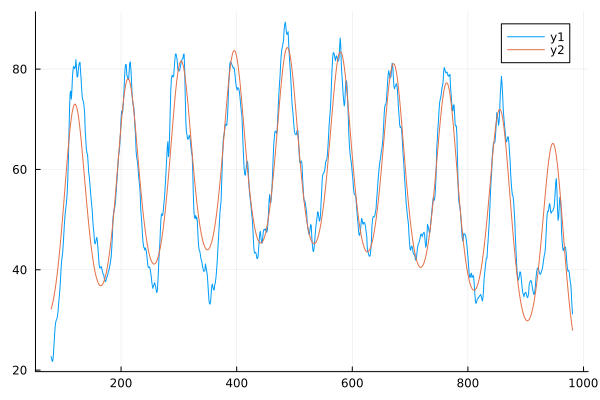

In [144]:
plot(x,y)
plot!(x, model(x, fit.param))
# plot!(x, model(x,p0))

In [147]:
r = (1.42/6.65)

0.21353383458646613

In [148]:
f = pi*sqrt(r)/(1-r)

1.8458787860803723

In [149]:
(0.59*pi^2/4)^0.5

1.2065515526328248